## Imports

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
import seaborn as sns

## Create Data Frames

In [2]:
df32 = pd.read_csv('yale32.csv')
df64 = pd.read_csv('yale64.csv')

subject_list = [num for num in range(1, 16) for _ in range(11)]
subject_list.pop()
df32['subject'] = subject_list
df64['subject'] = subject_list

## Create Training + Testing Sets

In [68]:
# 32 x 32 data
X = df32.drop('subject', axis=1)
y = df32['subject']
# 64 x 64 data
X2 = df64.drop('subject', axis=1)
y2 = df64['subject']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=45, random_state=45, stratify=y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=45, random_state=45, stratify=y)

## SVC Model

### 32 x 32

In [69]:
SVC32 = SVC(kernel='linear', probability=True)
SVC32.fit(X_train, y_train)

yhat_train = SVC32.predict(X_train)
yhat_test = SVC32.predict(X_test)

# Score
score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)

# Summarize
print('Accuracy of SVM Model for 32 x 32: train= %.3f, test= %.3f' % (score_train*100, score_test*100))

Accuracy of SVM Model for 32 x 32: train= 100.000, test= 71.111


### 64 x 64

In [70]:
SVCmod = SVC(kernel='linear', probability=True)
SVCmod.fit(X2_train, y2_train)


yhat_train2 = SVCmod.predict(X2_train)
yhat_test2 = SVCmod.predict(X2_test)

# Score
score_train2 = accuracy_score(y2_train, yhat_train2)
score_test2 = accuracy_score(y2_test, yhat_test2)
# Summarize
print('Accuracy for 64x64: train= %.3f, test= %.3f' % (score_train2*100, score_test2*100))

Accuracy for 64x64: train= 100.000, test= 68.889


## Random Forest Classifier

### 32 x 32

In [75]:
rfc32 = RandomForestClassifier(n_estimators=500)
rfc32.fit(X_train, y_train)

rf32_predictions = rfc32.predict(X_test)
print(classification_report(y_test,rf32_predictions))

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.43      1.00      0.60         3
           3       1.00      0.67      0.80         3
           4       0.60      1.00      0.75         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      0.67      0.80         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.67      0.67      0.67         3
          15       1.00      0.67      0.80         3

    accuracy                           0.78        45
   macro avg       0.84      0.78      0.78        45
weighted avg       0.84   

Confusion Matrix for Random Forest 32 x 32:



<AxesSubplot: >

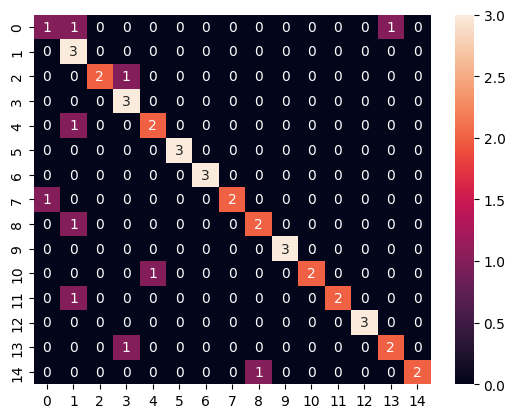

In [151]:
print("Confusion Matrix for Random Forest 32 x 32:")
print()
tree32_matrix = confusion_matrix(y_test,rf32_predictions)
sns.heatmap(tree32_matrix, annot=True)

In [78]:
rfc64 = RandomForestClassifier(n_estimators=700)
rfc64.fit(X2_train, y2_train)

rf64_predictions = rfc64.predict(X2_test)
print(classification_report(y2_test, rf64_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       0.67      0.67      0.67         3
           4       0.75      1.00      0.86         3
           5       0.43      1.00      0.60         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3
           8       1.00      0.67      0.80         3
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       0.50      0.67      0.57         3
          15       1.00      0.67      0.80         3

    accuracy                           0.80        45
   macro avg       0.87      0.80      0.80        45
weighted avg       0.87   

## KNN

### 32 x 32

In [158]:
knn32 = KNeighborsClassifier(n_neighbors = 5)
knn32.fit(X_train, y_train)

knn32_predict = knn32.predict(X_test)
print("Results for KNN 32 x 32 ")
print(classification_report(y_test, knn32_predict))

Results for KNN 32 x 32 
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.14      0.33      0.20         3
           3       0.50      0.67      0.57         3
           4       0.60      1.00      0.75         3
           5       0.50      1.00      0.67         3
           6       0.60      1.00      0.75         3
           7       1.00      0.67      0.80         3
           8       1.00      0.33      0.50         3
           9       0.50      0.33      0.40         3
          10       1.00      0.33      0.50         3
          11       1.00      0.67      0.80         3
          12       1.00      0.33      0.50         3
          13       1.00      0.67      0.80         3
          14       1.00      0.67      0.80         3
          15       1.00      0.67      0.80         3

    accuracy                           0.60        45
   macro avg       0.75      0.60      0.61        45
w

<AxesSubplot: >

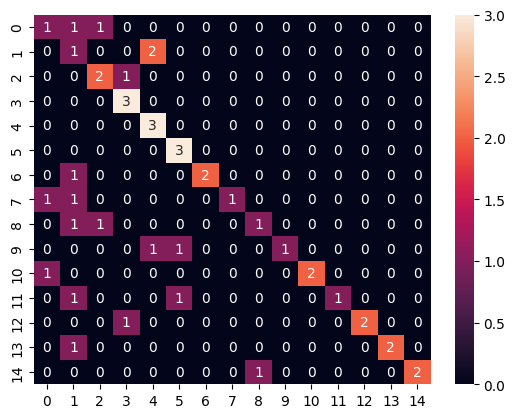

In [160]:
knn32_matrix = confusion_matrix(y_test, knn32_predict)
sns.heatmap(knn32_matrix, annot=True)

### 64 x 64

In [154]:
knn64 = KNeighborsClassifier(n_neighbors = 5)
knn64.fit(X2_train, y2_train)

knn64_predict = knn64.predict(X2_test)
print("Results for KNN 64 x 54 ")
print(classification_report(y2_test, knn64_predict))

Results for KNN 64 x 54 
              precision    recall  f1-score   support

           1       0.30      1.00      0.46         3
           2       0.50      0.67      0.57         3
           3       0.67      0.67      0.67         3
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      0.67      0.67         3
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         3
           9       1.00      0.33      0.50         3
          10       1.00      0.67      0.80         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       0.67      0.67      0.67         3
          14       1.00      0.67      0.80         3
          15       1.00      0.67      0.80         3

    accuracy                           0.67        45
   macro avg       0.75      0.67      0.66        45
w

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<AxesSubplot: >

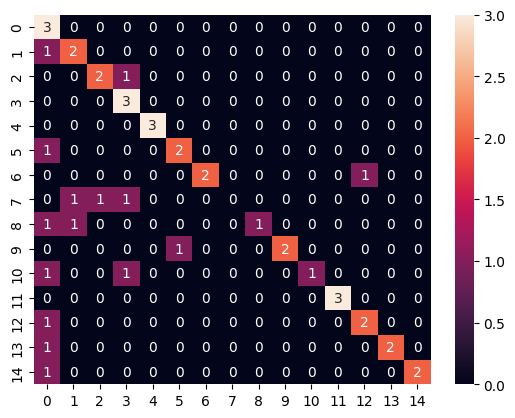

In [155]:
knn64_matrix = confusion_matrix(y_test, knn64_predict)
sns.heatmap(knn64_matrix, annot=True)

## Logistic Regression

### 32 x 32

In [161]:
logreg32 = LogisticRegression(maxiter=1000)
logreg32.fit(X_train, y_train)

log32_pred = logreg32.predict(X_test)

print("Results for Log Reg 32 x 32 ")
print(classification_report(y_test, log32_pred))

Results for Log Reg 32 x 32 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.33      0.33      0.33         3
           3       0.67      0.67      0.67         3
           4       0.40      0.67      0.50         3
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      0.67      0.80         3
           8       1.00      0.33      0.50         3
           9       0.33      0.33      0.33         3
          10       0.75      1.00      0.86         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       0.67      0.67      0.67         3
          14       1.00      1.00      1.00         3
          15       1.00      0.67      0.80         3

    accuracy                           0.73        45
   macro avg       0.78      0.73      0.73        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

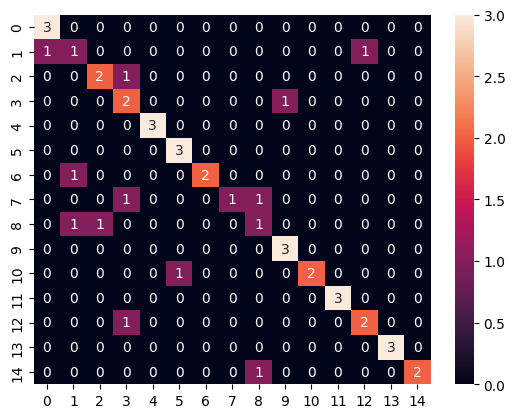

In [172]:
log32_matrix = confusion_matrix(y_test, log32_pred)
sns.heatmap(log32_matrix, annot=True)

### 64 x 64

In [162]:
logreg64 = LogisticRegression()
logreg64.fit(X2_train, y2_train)

log64_pred = logreg64.predict(X2_test)

print("Results for Log Reg 64 x 64 ")
print(classification_report(y2_test, log64_pred))

Results for Log Reg 64 x 64 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.67      0.67      0.67         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.50      0.33      0.40         3
           7       0.33      0.33      0.33         3
           8       0.67      0.67      0.67         3
           9       1.00      0.33      0.50         3
          10       0.50      1.00      0.67         3
          11       1.00      0.33      0.50         3
          12       0.60      1.00      0.75         3
          13       0.67      0.67      0.67         3
          14       0.50      0.33      0.40         3
          15       1.00      0.67      0.80         3

    accuracy                           0.69        45
   macro avg       0.73      0.69      0.67        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

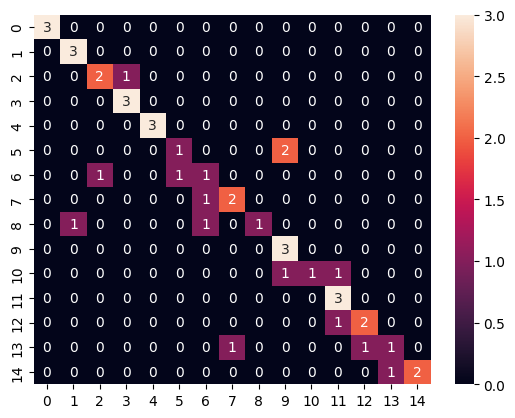

In [173]:
log64_matrix = confusion_matrix(y_test, log64_pred)
sns.heatmap(log64_matrix, annot=True)

## Who Knows

### 32 x 32

In [152]:
clf = HistGradientBoostingClassifier().fit(X_train, y_train)

boost32_pred = clf.predict(X_test)

print(classification_report(y_test, boost32_pred))

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       0.75      1.00      0.86         3
           5       0.67      0.67      0.67         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         3
           8       0.67      0.67      0.67         3
           9       1.00      0.67      0.80         3
          10       0.75      1.00      0.86         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      0.67      0.80         3

    accuracy                           0.82        45
   macro avg       0.84      0.82      0.82        45
weighted avg       0.84   

<AxesSubplot: >

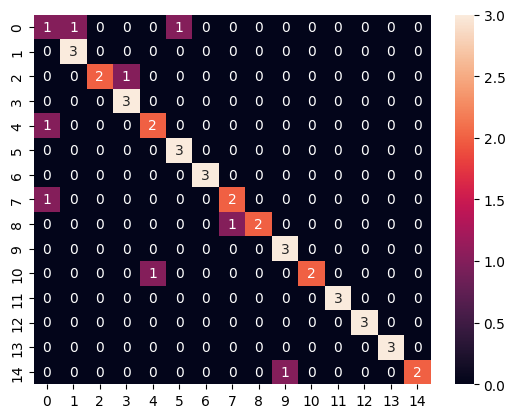

In [153]:
boost32_matrix = confusion_matrix(y_test, boost32_pred)
sns.heatmap(boost32_matrix, annot=True)

### 64 x 64

In [147]:
clf2 = HistGradientBoostingClassifier().fit(X2_train, y2_train)

print(classification_report(y2_test, clf2.predict(X2_test)))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       0.75      1.00      0.86         3
           5       0.75      1.00      0.86         3
           6       0.67      0.67      0.67         3
           7       0.60      1.00      0.75         3
           8       1.00      0.33      0.50         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      0.67      0.80         3
          13       0.67      0.67      0.67         3
          14       0.40      0.67      0.50         3
          15       1.00      0.67      0.80         3

    accuracy                           0.78        45
   macro avg       0.84      0.78      0.78        45
weighted avg       0.84   